## 2012.1.1 - 2017.9.2 Baltimore Victim-Based Crime exploratory data analysis


In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# read in kaggle 2012-2017 dataset
df = pd.read_csv("Resources/2012-2017_BPD_Victim_Based_Crime_Data.csv")
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


## Data cleaning and preparation

Post and CrimeCode dropped. Inside/Ouside cleaned. "Time of Day" and "Day of Week" series added. No null values have been dropped (for example, there are 10,000 nulls in "Inside/Outside", or 3% of the data). 


In [3]:
# data cleaning and organization

# remove series
df.drop(columns=["CrimeCode", "Post"], inplace=True)

# consolidate Inside/Outside values, merging "O" and "I" with "Outside" and "Inside"
df["Inside/Outside"] = df["Inside/Outside"].replace({"Outside": "O", "Inside": "I"})

# convert day to datetime data type
df.CrimeDate = pd.to_datetime(df.CrimeDate)

# change midnight for to_datetime
# create temp series CrimeTimeTemp for splitting data into Time of Day
df.loc[df.CrimeTime == "24:00:00", "CrimeTime"] = "00:00:00"
df["CrimeTimeTemp"] = pd.to_datetime(df.CrimeTime, format="%H:%M:%S")

# create bins and labels for morning, afternoon, evening, late night
# -1 because it kept populating "Time of Day" with NaN for any 0 hours (12am)
bins = [-1, 6, 12, 18, 24]
labels = ["Late Night", "Morning", "Afternoon", "Evening"]

# pd.cut likes ints, so dt.hour extracts the hour for comparison with bins
# remove CrimeTimeTemp from the df
df["Time of Day"] = pd.cut(
    df.CrimeTimeTemp.dt.hour, bins=bins, labels=labels
)
df.drop(columns=["CrimeTimeTemp"], inplace=True)

# add 'Day of Week' series
df["Day of Week"] = df["CrimeDate"].dt.day_name()


In [4]:
df

,CrimeDate,CrimeTime,Location,Description,Inside/Outside,Weapon,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents,Time of Day,Day of Week
0,2017-09-02,23:30:00,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1,Evening,Saturday
1,2017-09-02,23:00:00,800 NEWINGTON AVE,AUTO THEFT,O,NaN,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1,Evening,Saturday
2,2017-09-02,22:53:00,600 RADNOR AV,SHOOTING,O,FIREARM,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1,Evening,Saturday
3,2017-09-02,22:50:00,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1,Evening,Saturday
4,2017-09-02,22:31:00,100 LIGHT ST,COMMON ASSAULT,O,HANDS,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1,Evening,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276524,2012-01-01,00:00:00,1400 JOH AVE,LARCENY,I,NaN,SOUTHWESTERN,Violetville,-76.67195,39.26132,"(39.2613200000, -76.6719500000)",OTHER - IN,1,Late Night,Sunday
276525,2012-01-01,00:00:00,5500 SINCLAIR LN,LARCENY,O,NaN,NORTHEASTERN,Frankford,-76.53829,39.32493,"(39.3249300000, -76.5382900000)",OTHER - OU,1,Late Night,Sunday
276526,2012-01-01,00:00:00,400 N PATTERSON PK AV,LARCENY,O,NaN,EASTERN,CARE,-76.58497,39.29573,"(39.2957300000, -76.5849700000)",STREET,1,Late Night,Sunday
276527,2012-01-01,00:00:00,5800 LILLYAN AV,BURGLARY,I,NaN,NORTHEASTERN,Glenham-Belhar,-76.54578,39.34701,"(39.3470100000, -76.5457800000)",APT. LOCKE,1,Late Night,Sunday


## Initial visualizations

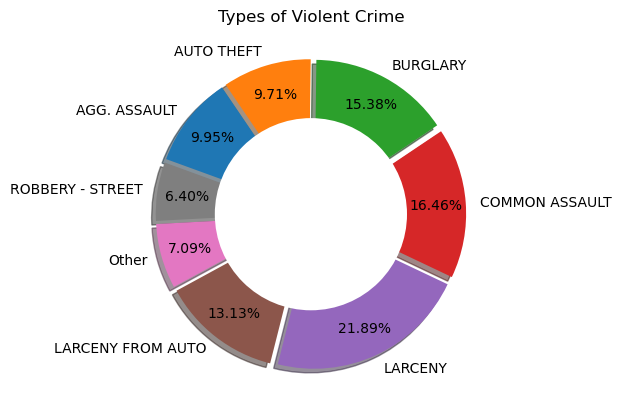

In [5]:
# pie chart of types of victim-based crime

#create temporary data frame of value counts for types of crime
desc_df = df.Description.value_counts()
desc_df = desc_df.to_frame().reset_index()
desc_df.rename(columns={'index': 'Description', 'Description': 'count'}, inplace=True)

# condense small values into a single 'Other' category
small_values = (desc_df['count'] /len(df)) < .05
desc_df.loc[small_values, 'Description'] = 'Other'
desc_df = desc_df.groupby('Description')['count'].sum()

# plot the pie chart
plt.pie(
    desc_df.values,
    labels=desc_df.index,
    explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05),
    shadow=True,
    startangle=160,
    autopct="%1.2f%%",
    pctdistance=0.8,
    counterclock=False,
)

plt.title("Types of Violent Crime")

# add a donut hole to the pie chart
# gcf - get current figure, gca - get current axis
donut = plt.Circle((0, 0), 0.65, facecolor="white")
plt.gcf().gca().add_artist(donut)

plt.show()

## Question - Crime by Hour vs various indicators

    Katie - scatter plot of crime by Hour, add a line for each day of the week

    Bryan - line chart of number of crimes per year, categorized by time of day (late night, morning, afternoon, evening)

    Siobhan - rework Katie's scatter plot of crime by hour to make a line for each description of crime
    
    statistical test (ANOVA, t-test, or chi-square)

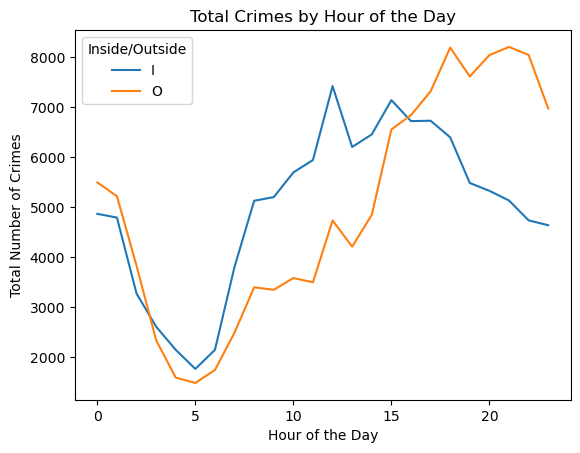

In [6]:
# temporary data frame
pre2017_df = df[df["CrimeDate"].dt.year < 2017].copy()
pre2017_df["CrimeTimeTemp"] = pd.to_datetime(pre2017_df.CrimeTime, format="%H:%M:%S")

# unstack pivots the table
_ = pre2017_df.groupby([pre2017_df["CrimeTimeTemp"].dt.hour, "Inside/Outside"]).size().unstack()

# plot the chart
# need to remove warning
_.plot(kind='line')
plt.title("Total Crimes by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Number of Crimes")
plt.show()

In [7]:
# ANOVA! time of day does not impact crime level in/out
m = df[df["Time of Day"] == "Morning"].groupby(df["Inside/Outside"]).size()
a = df[df["Time of Day"] == "Afternoon"].groupby(df["Inside/Outside"]).size()
e = df[df["Time of Day"] == "Evening"].groupby(df["Inside/Outside"]).size()
n = df[df["Time of Day"] == "Late Night"].groupby(df["Inside/Outside"]).size()

print(f"""{st.f_oneway(m, a, e, n)}
Time has no statistical impact on the difference between crime indoors and outdoors""")

F_onewayResult(statistic=2.5018363212325165, pvalue=0.19835815971583926)
Time has no statistical impact on the difference between crime indoors and outdoors


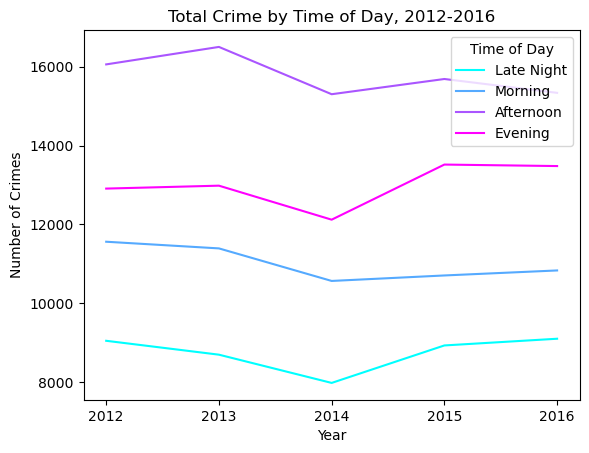

In [8]:
# temporary data frame dropping 2017 (which ends September 2nd, skewing totals)
pre2017_df = df[df.CrimeDate.dt.year < 2017]

# unstack pivots the table
x = pre2017_df.groupby([pre2017_df.CrimeDate.dt.year, "Time of Day"]).size().unstack()

x.plot(kind='line', cmap=plt.colormaps.get_cmap("cool"))
plt.title("Total Crime by Time of Day, 2012-2016")
plt.xticks(x.index.astype(int))
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()

In [9]:
# ANOVA
pre2017_df = df[df["CrimeDate"].dt.year < 2017]

#group populations by time of day category
m = pre2017_df[pre2017_df["Time of Day"] == "Morning"].groupby(pre2017_df["CrimeDate"].dt.year).size()
a = pre2017_df[pre2017_df["Time of Day"] == "Afternoon"].groupby(pre2017_df["CrimeDate"].dt.year).size()
e = pre2017_df[pre2017_df["Time of Day"] == "Evening"].groupby(pre2017_df["CrimeDate"].dt.year).size()
n = pre2017_df[pre2017_df["Time of Day"] == "Late Night"].groupby(pre2017_df["CrimeDate"].dt.year).size()

print(f"""{st.f_oneway(m, a, e, n)}
Note the extremely small pvalue. Crime is impacted by the time of day""")

F_onewayResult(statistic=181.68417620148915, pvalue=1.4417942015211965e-12)
Note the extremely small pvalue. Crime is impacted by the time of day


## Question - Crime by Day of Week vs various indicators

    Rob - crime by day of week / scatter plot (or line plot) of crime by hour, but with a line for each year

    Rob - crime description by day of week
    
    statistical test (ANOVA, t-test, or chi-square)

## Question - Crime by Year

    Siobhan - ?Stacked? Bar plot of crime Description by year

    Bryan - plot of crime for each year (by month, instead of day - ?mention Freddie Grey?)
    
    statistical test (ANOVA, t-test, or chi-square)

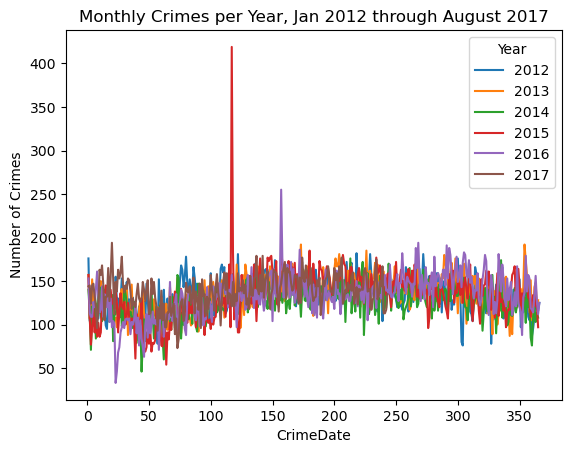

The giant spike in 2015 is the protests following the death of Freddie Gray.

Day 157 of 2016 is 5 June 2016, according to the internet.
But further research is needed to find out what happened around that day.


In [10]:
# huge outlier - Freddie Gray
import calendar

year_df = df.copy()
year_df["Year"] = year_df.CrimeDate.dt.year
year_df["Month"] = year_df.CrimeDate.dt.month
year_df["Day"] = year_df.CrimeDate.dt.year
year_df = year_df[year_df.CrimeDate < "2017-09-01"]

_ = year_df.groupby(year_df.CrimeDate.dt.dayofyear)["Year"].value_counts().unstack()
_.plot(kind='line')

# Format the plot
plt.ylabel("Number of Crimes")
plt.title("Monthly Crimes per Year, Jan 2012 through August 2017")
plt.show()

print(f"""The giant spike in 2015 is the protests following the death of Freddie Gray.

Day {_[2016].idxmax()} of 2016 is 5 June 2016, according to the internet.
But further research is needed to find out what happened around that day.""")

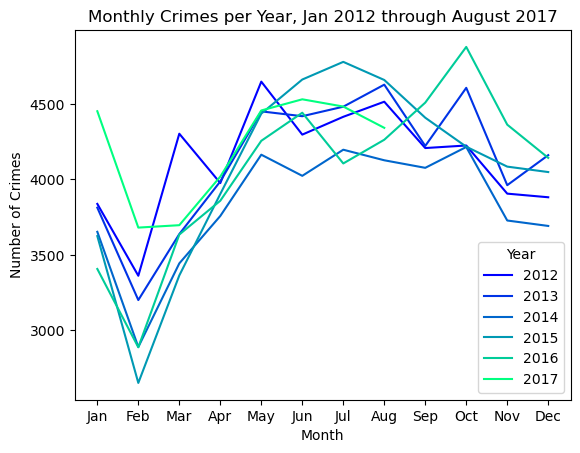

In [11]:
import calendar

year_df = df.copy()
year_df["Year"] = year_df.CrimeDate.dt.year
year_df["Month"] = year_df.CrimeDate.dt.month
year_df = year_df[year_df.CrimeDate < "2017-09-01"]

_ = year_df.groupby("Month")["Year"].value_counts().unstack()
_.plot(kind='line', cmap=plt.colormaps.get_cmap('winter'))

# Format the plot
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:])
plt.ylabel("Number of Crimes")
plt.title("Monthly Crimes per Year, Jan 2012 through August 2017")
plt.show()

## Statistical Analysis

In [12]:
# chi square
_ = pd.crosstab(pre2017_df["Time of Day"], pre2017_df["Day of Week"])
print(f"""{_}


Chi square test:

{st.chisquare(_)}

Chisquare contingency:

{st.chi2_contingency(_)}""")

Day of Week  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
Time of Day                                                                
Late Night     5842    5768      7832    8039      5501     5383       5399
Morning        8433    8605      6339    5973      8450     8636       8623
Afternoon     12393   11708     10356    9707     11405    11599      11708
Evening        9865    9296      9362    8902      9163     9301       9117


Chi square test:

Power_divergenceResult(statistic=array([2461.78575534, 2026.81931764, 1097.80102688,  949.24039729,
       2063.53078015, 2264.49173802, 2309.97569375]), pvalue=array([0.00000000e+000, 0.00000000e+000, 1.09177424e-237, 1.84565997e-205,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))

Chisquare contingency:

Chi2ContingencyResult(statistic=2679.7751310903027, pvalue=0.0, dof=18, expected_freq=array([[ 6587.54542346,  6379.0981974 ,  6110.78550504,  5882.14269999,
         6224.38563688,  6296.51270472,  6283

In [13]:
print("""The chi square statistics indicate there is a strong statistical link between the time of day and day of the week.
""")

The chi square statistics indicate there is a strong statistical link between the time of day and day of the week.

